In [38]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean


ds = xr.open_dataset('/Volumes/external/TIW/data/era5/quick-2017.nc')

time = '2017-12-07 14'
ds = ds.sel(valid_time=time)

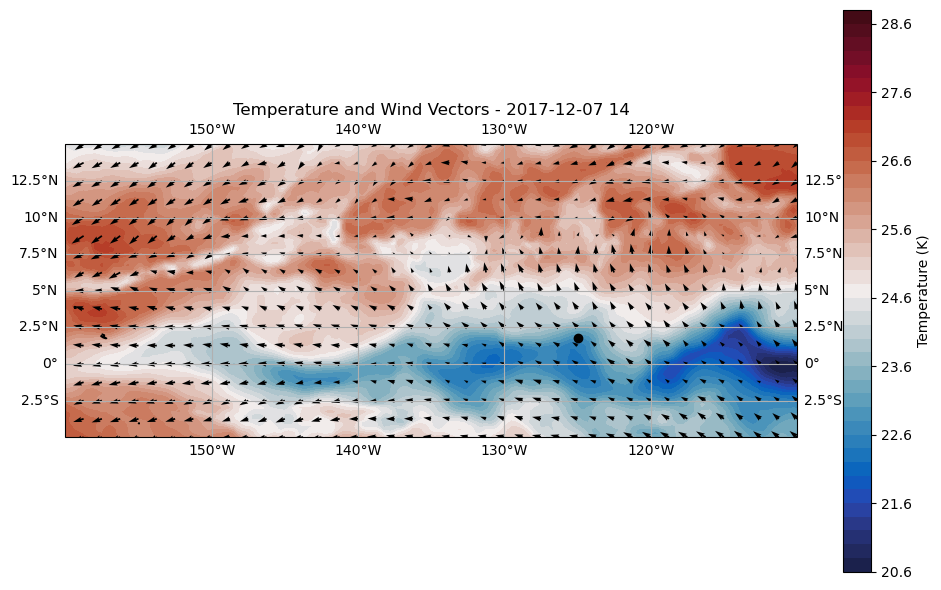

In [40]:

# Subset variables
temp = ds['t2m']-273.15  # replace with actual name if different
u = ds['u10']   # replace with actual name if different
v = ds['v10']   # replace with actual name if different
lon = ds['longitude']
lat = ds['latitude']

# Create plot
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(f'Temperature and Wind Vectors - {time}')

# Plot temperature contours
temp_plot = ax.contourf(lon, lat, temp.squeeze(), levels=50, cmap=cmocean.cm.balance, transform=ccrs.PlateCarree())

# Plot wind vectors
q = ax.quiver(lon[::5], lat[::5], u.squeeze()[::5, ::5], v.squeeze()[::5, ::5], scale=600, transform=ccrs.PlateCarree())

ax.scatter(-125, 1.8,color='k')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
ax.set_ylim(-5,15)
ax.set_xlim(-160,-110)

# Add colorbar
plt.colorbar(temp_plot, orientation='vertical', label='Temperature (K)')

plt.tight_layout()
plt.show()


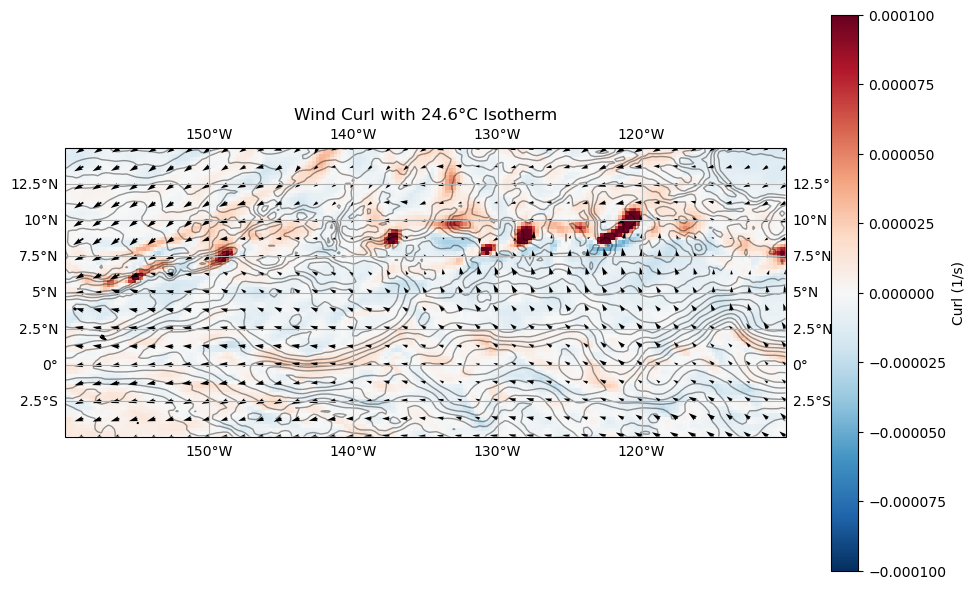

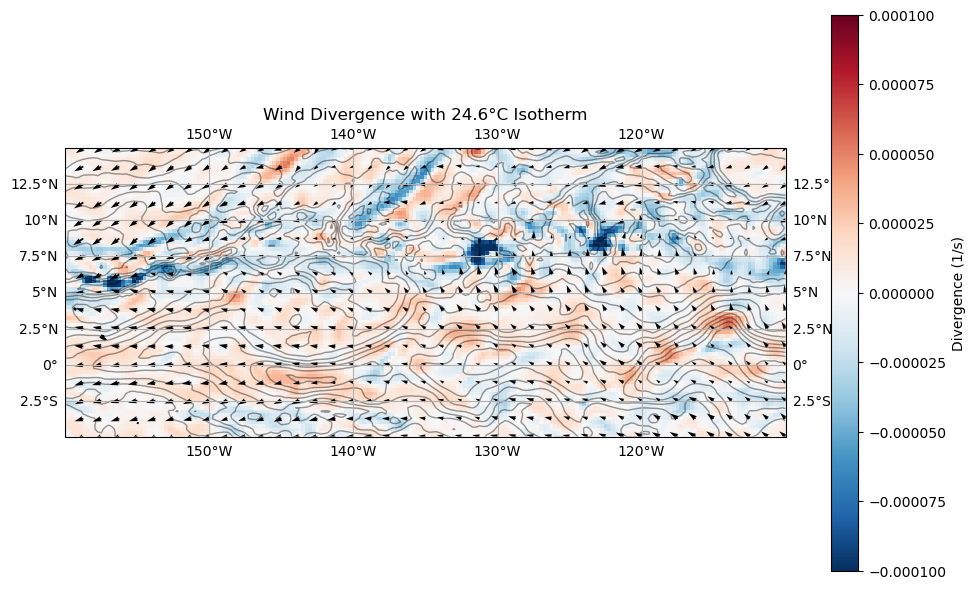

In [67]:
import numpy as np
Lon, Lat = np.meshgrid(lon, lat)

# Earth radius
Re = 6.371e6  # meters

# Convert lat/lon spacing to meters
deg2rad = np.pi / 180
dx = np.gradient(Lon, axis=1) * deg2rad * Re * np.cos(Lat * deg2rad)
dy = np.gradient(Lat, axis=0) * deg2rad * Re

# Compute gradients
du_dy = np.gradient(u.squeeze(), axis=0) / dy
dv_dx = np.gradient(v.squeeze(), axis=1) / dx
dv_dy = np.gradient(v.squeeze(), axis=0) / dy
du_dx = np.gradient(u.squeeze(), axis=1) / dx

# Compute divergence and curl
div = du_dx + dv_dy
curl = dv_dx - du_dy

# 24.6°C = 297.75 K
isotherm_vals = 24.5

# -----------------
# Plot: Curl
# -----------------
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
pcm = ax.pcolormesh(lon, lat, curl, cmap='RdBu_r', shading='auto',vmin=-0.0001,vmax=0.0001)
ax.quiver(lon[::5], lat[::5], u.squeeze()[::5, ::5], v.squeeze()[::5, ::5], scale=700)
temp.squeeze().plot.contour(ax=ax, levels=isotherm_vals, colors='black', linewidths=1, transform=ccrs.PlateCarree(),alpha=0.4)
ax.set_title('Wind Curl with 24.6°C Isotherm')
ax.set_ylim(-5,15)
ax.set_xlim(-160,-110)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
plt.colorbar(pcm, ax=ax, orientation='vertical', label='Curl (1/s)')
plt.tight_layout()

# -----------------
# Plot: Divergence
# -----------------
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
pcm = ax.pcolormesh(lon, lat, div, cmap='RdBu_r', shading='auto',vmin=-0.0001,vmax=0.0001)
ax.quiver(lon[::5], lat[::5], u.squeeze()[::5, ::5], v.squeeze()[::5, ::5], scale=700)
temp.squeeze().plot.contour(ax=ax, levels=isotherm_vals, colors='black', linewidths=1, transform=ccrs.PlateCarree(),alpha=0.4)
ax.set_title('Wind Divergence with 24.6°C Isotherm')
ax.set_ylim(-5,15)
ax.set_xlim(-160,-110)
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)
plt.colorbar(pcm, ax=ax, orientation='vertical', label='Divergence (1/s)')
plt.tight_layout()

plt.show()
